# Assignment 6: Model Evaluation and Model Selection

### Objective: In this assignment, you will gain hands-on experience in evaluating the performance of machine learning models and selecting the best features for your model. The assignment will focus on the following concepts:

- Accuracy evaluation using cross-validation
- Confidence intervals for the accuracy or the error rate
- Hyperparameter tuning using grid search
- Evaluation metrics such as Precision, Recall, and F1-Score, ROC-AUC
- Feature selection methods: Filter methods, Embedded methods, and Wrapper methods
- Feature extraction methods, such as Principal Component Analysis (PCA)

### Dataset:

In this assignment we will use the "Bank Marketing" dataset. This dataset is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe to a term deposit (yes/no). 

The dataset contains 20 input features, such as age, job, marital status, education, and others. The target variable is imbalanced, with the majority of the clients not subscribing to the term deposit.

You can find the Bank Marketing dataset on the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

For your convenience, the dataset has been dowloaded and can be found in the Data folder.

## Write Python code to complete each of the tasks below.

### 1. Load the dataset into a Pandas dataframe and show the first five rows.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('data/bank-additional.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### 2. Preprocess the data

The dataset contains a combination of numberic and categorical features. The majority of machine learning algorithms work with numeric features. For that reason, we need to convert all our features to numeric by introducing dummy variables using one-hot encoding. We will also normalize the numeric featues to a mean of zero and std of one as most ML algorithms work best with normalized features.

(The solution to this step is given below)

In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preprocess categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_features = [col for col in data.columns if col not in categorical_features + ['y']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Split into features and targets
X = data.drop(columns=['y'])
y = data['y'].map({'no': 0, 'yes': 1})

# Preprocess the features
X = preprocessor.fit_transform(X)

# Get the column names for the one-hot encoded features
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)

# Combine the numeric and one-hot encoded feature names
all_feature_names = numeric_features + list(onehot_columns)

# Convert the transformed matrix X back into a DataFrame with the feature names. Pandas provides functions for explorarory data analysis.
X = pd.DataFrame(X, columns=all_feature_names)

print(X.head())

        age  duration  campaign     pdays  previous  emp.var.rate  \
0 -0.980752  0.903952 -0.209228  0.201031 -0.351356     -1.206054   
1 -0.107991  0.350300  0.569634  0.201031 -0.351356      0.649441   
2 -1.465619 -0.116966 -0.598660  0.201031 -0.351356      0.841389   
3 -0.204965 -0.941553  0.180203  0.201031 -0.351356      0.841389   
4  0.667795 -0.780563 -0.598660  0.201031 -0.351356     -0.118350   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_oct  \
0       -1.185448      -1.240939  -1.331707    -0.914779  ...        0.0   
1        0.715193       0.892269   0.711698     0.332862  ...        0.0   
2        1.528273      -0.283172   0.773427     0.836535  ...        0.0   
3        1.528273      -0.283172   0.771697     0.836535  ...        0.0   
4       -0.655478      -0.326707   0.328632     0.398028  ...        0.0   

   month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  \
0        0.0              1.0              0.0              0

### 3. Perform and Exploratory Data Analysis

1. Display a histogram of each feature so we can see the distribution of their values.
2. Use Seaborn to display a barplot of the correlation of each feature with the target variable.

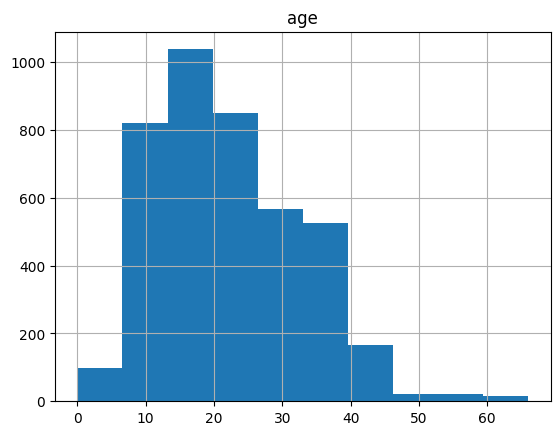

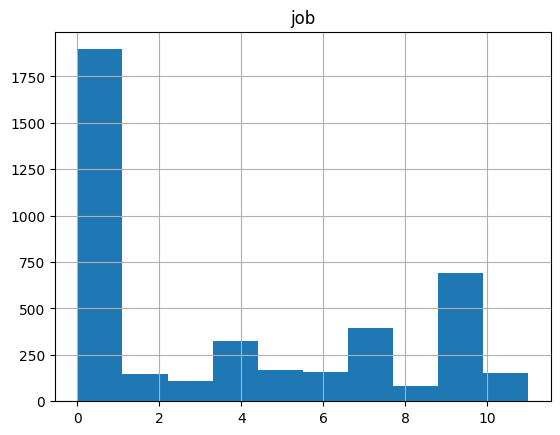

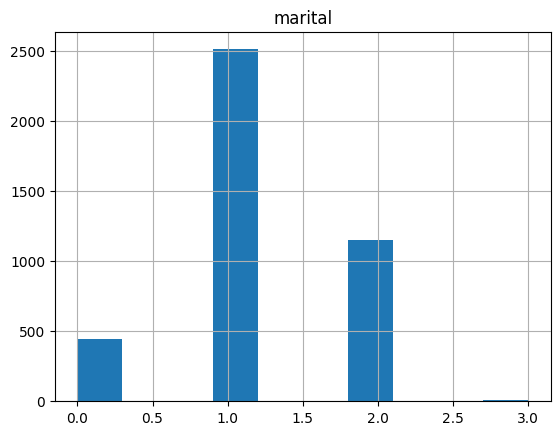

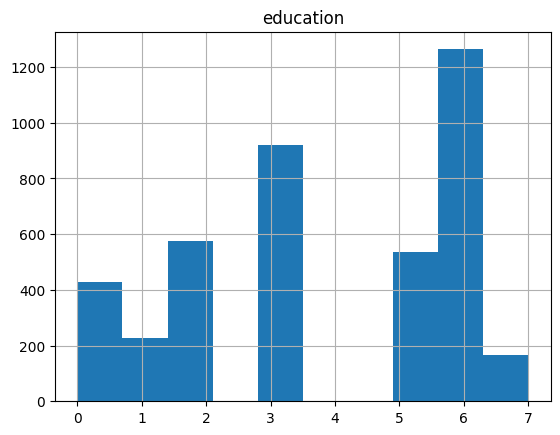

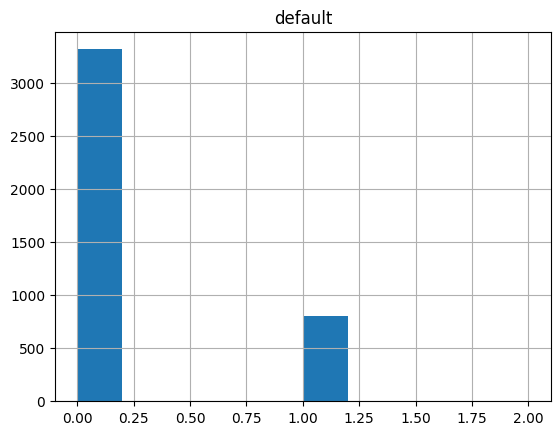

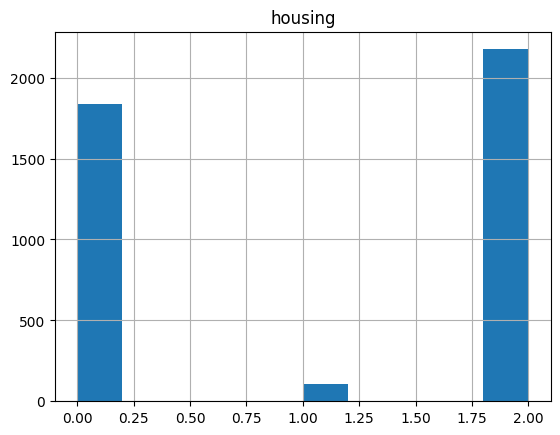

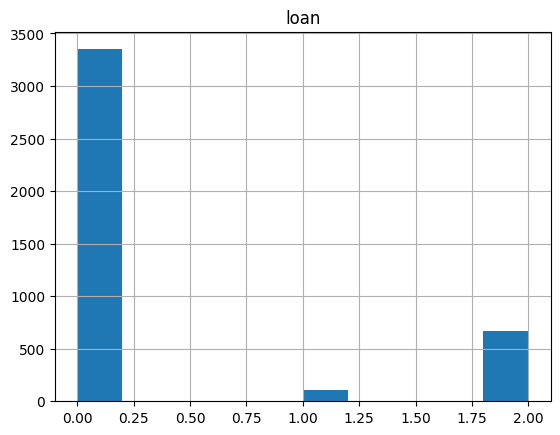

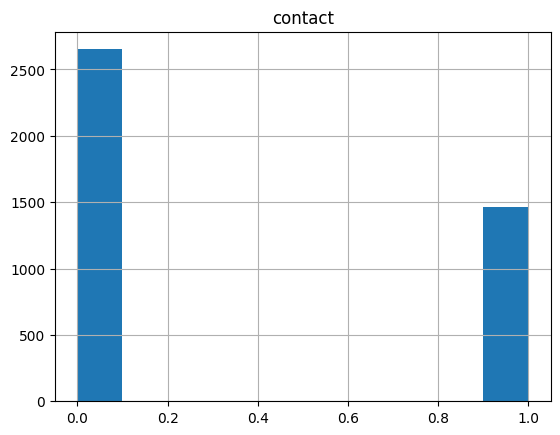

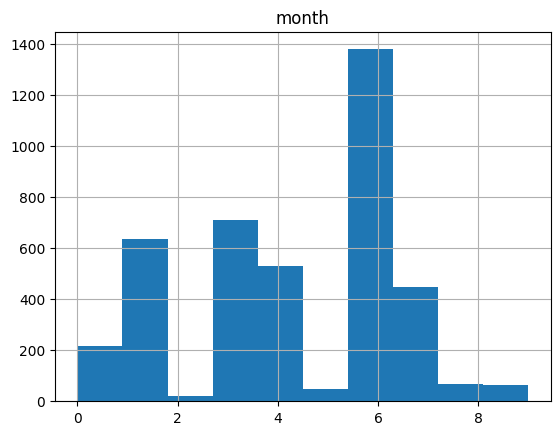

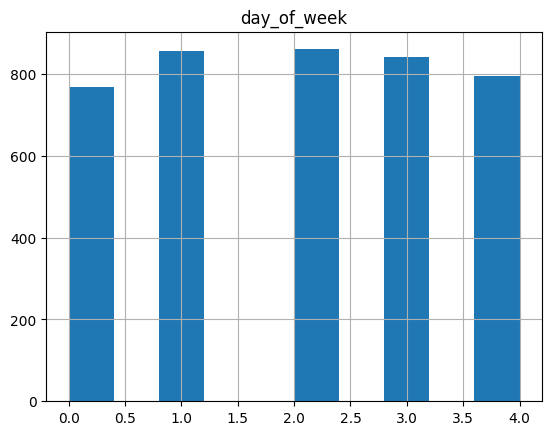

In [54]:
# display a histogram of each feature
for column in data.columns[0:10]:
    if data[column].dtype in ['int64', 'float64']:
        plt.figure()
        data[column].hist()
        plt.title(column)
        plt.show()

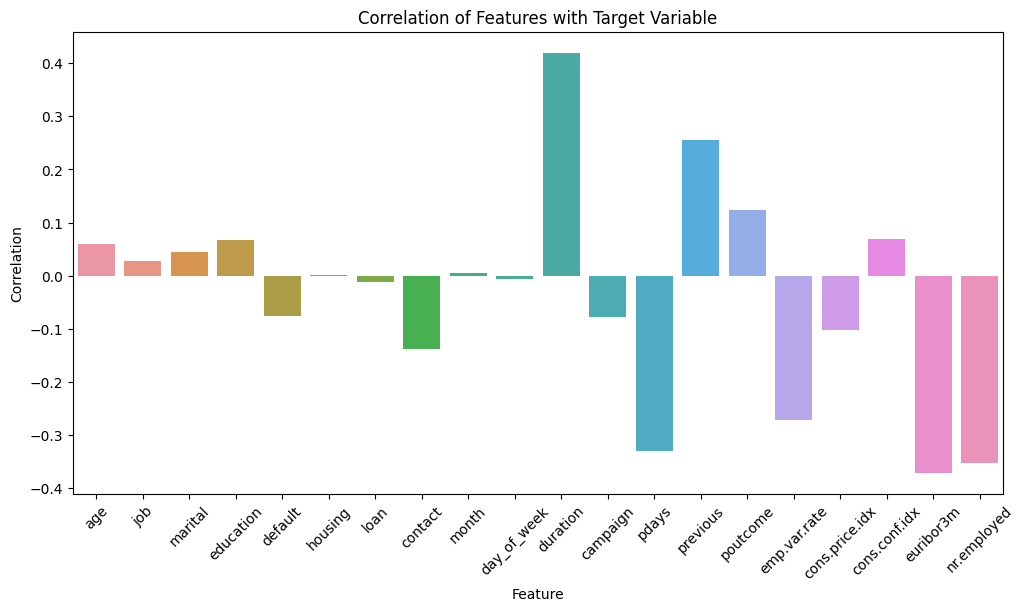

In [55]:
# display a barplot of the correlation of each feature with target variable
categorical_columns = data.iloc[0:10]
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])
    
correlations = data.corr().iloc[:, -1].drop(data.columns[-1])
correlations_df = pd.DataFrame(correlations).reset_index()
correlations_df.columns = ["Feature", "Correlation"]

plt.figure(figsize=(12, 6))
sns.barplot(x="Feature", y="Correlation", data=correlations_df)
plt.xticks(rotation=45)
plt.title("Correlation of Features with Target Variable")
plt.show()

**What are your takeways from the exploratory data analysis?**

Based on the results of the correlation of features with the target variable, it appears that age, job, marital status, education, outcome of the previous marketing campaign, and consumer price index are all good indicators on whether or not a client has subscribed to a term deposit, with the day of the week and number of contacts performed before the campaign for the client being the top two correlated features. The inverse relation of the rest of the features indicates that they do not have a strong correlation, or any at all, to the target variable, which is whether or not the client subscribed to a term deposit. Additionally, the histograms for the features that have an inverse relation with the target variable show more outliers than the features that have a positive correlation with the target varible, which may indicate that these features contain noisy data.

### 4. Split the data into a stratified 80/20 train/test split.

In [61]:
from sklearn.model_selection import train_test_split
X = data.drop(['y'], axis=1).values
y = data['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

(3295, 20)
(824, 20)


### 5. Apply feature selection

Use the following feature selection methods:
1. Filter: Variance Threshold with a threshold of 0.1
2. Embedded: Use the LASSO L1 penalty in the LogisticRegressionCV and keep the features with non-zero coefficients
3. Wrapper: Use Recursive Feature Elimination (RFECV) with Logistic Regression as the estimator.
4. Feature Extraction: Use PCA to extract the top 20 components

For the first three feature selection methods, print out the names of the features that were selected.

**Note:** Since this is an imbalanced dataset using the default scoring criterion, which is classification Accuracy, will not yield good results. For that reason, you should use the F1-Score (`scoring='f1'`) whenever you fit a classifier.

In [94]:
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

X = pd.DataFrame(X)

# variance threshold
selector = VarianceThreshold(threshold=0.1)
X_selected_filter = selector.fit_transform(X)
selected_features_filter = X.columns[selector.get_support()]
print("Variance Threshold selected features:\n", selected_features_filter)

# LASSO
logreg_cv = LogisticRegressionCV(Cs=10, penalty='l1', solver='liblinear', scoring='f1', cv=5)
logreg_cv.fit(X, y)
non_zero_coefficients = logreg_cv.coef_ != 0
selected_features_lasso = X.columns[non_zero_coefficients.ravel()]
print("LASSO L1 penalty selected features:\n", selected_features_lasso)

# RFECV
logreg = LogisticRegression(solver='liblinear', random_state=42)
rfecv = RFECV(estimator=logreg, step=1, cv=StratifiedKFold(5), scoring='f1')
rfecv.fit(X, y)
selected_features_rfecv = X.columns[rfecv.get_support()]
print("RFECV selected features:\n", selected_features_rfecv)

# PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

Variance Threshold selected features:
 Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')
LASSO L1 penalty selected features:
 Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')
RFECV selected features:
 Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')


### 6. Fine Tune a Classification Algorithm

We will use the `GradientBoostingClassifier` which is know to be one of the most powefull ensemble algorithms. Some of the hyperparameters that can be tuned when training a GradientBoostingClassifier are:
- Number of estimators (trees): try 100, 200, 300
- Learning rate: try 0.01, 0.1
- Max (tree) depth: try 3, 4

Use `GridSearchCV` to train your classifier for the different hyperparameter values. Remember to use F1-score as your scoring criterion.

Tune your model on the features selected by each one of the methods above.

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
}

# variance threshold
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_filter], y, test_size=0.2, stratify=y)
gb_clf = GradientBoostingClassifier()
grid_search = GridSearchCV(clf, param_grid, scoring='f1', cv=5)
grid_search.fit(X_train, y_train)
print("best hyperparams for variance threshold:", grid_search.best_params_)
best_gb_clf = grid_search.best_estimator_
print("f1-score for variance threshold features:", f1_score(y_test, best_variance_threshold_estimator.predict(X_test)))

# LASSO
X_train_lasso, X_test_lasso, y_train, y_test = train_test_split(X[selected_features_lasso], y, test_size=0.2, stratify=y)
grid_search.fit(X_train_lasso, y_train)
print("best hyperparams for LASSO L1 penalty features:", grid_search.best_params_)
best_gb_clf_lasso = grid_search.best_estimator_
print("f1-score for LASSO L1 penalty features:", f1_score(y_test, best_lasso_estimator.predict(X_test_lasso)))

# RFECV
X_train_rfecv, X_test_rfecv, y_train, y_test = train_test_split(X[selected_features_rfecv], y, test_size=0.2, stratify=y)
grid_search.fit(X_train_rfecv, y_train)
print("best hyperparams for RFECV:", grid_search.best_params_)
best_gb_clf_rfecv = grid_search.best_estimator_
print("f1-score for RFECV:", f1_score(y_test, best_rfecv_estimator.predict(X_test_rfecv)))

# PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y)
grid_search.fit(X_train_pca, y_train)
print("best hyperparams for PCA:", grid_search.best_params_)
best_gb_clf_pca = grid_search.best_estimator_
print("f1-score for PCA:", f1_score(y_test, best_pca_estimator.predict(X_test_pca)))

best hyperparams for variance threshold: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
f1-score for variance threshold features: 0.8409090909090908
best hyperparams for LASSO L1 penalty features: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
f1-score for LASSO L1 penalty features: 0.7407407407407408
best hyperparams for RFECV: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
f1-score for RFECV: 0.6625766871165644
best hyperparams for PCA: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
f1-score for PCA: 0.8170731707317074


### 7. Evaluate your tuned models on the test data

For each one of the tuned models, print out the following metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

For the model that produces the best f1-score, print out the confusion matrix and classification report using the skearn `classification_report` function.


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

models = [
    (best_gb_clf, "Variance Threshold"),
    (best_gb_clf_lasso, "LASSO L1 penalty"),
    (best_gb_clf_rfecv, "Recursive Feature Elimination"),
    (best_gb_clf_pca, "PCA")
]

test_sets = [
    X_test,
    X_test_lasso,
    X_test_rfecv,
    X_test_pca
]

# metrics for each model
best_model, best_f1 = None, 0
for (model, name), X_test_set in zip(models, test_sets):
    y_pred = model.predict(X_test_set)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print()
    
    if f1 > best_f1:
        best_f1 = f1
        best_model = (model, name, X_test_set)
    
best_gb_clf, best_name, best_X_test = best_model
best_y_pred = best_gb_clf.predict(best_X_test)

# confusion matrix
print(f"Confusion Matrix for {best_name}:")
print(confusion_matrix(y_test, best_y_pred))

# classification report
print(f"Classification Report for {best_name}:")
print(classification_report(y_test, best_y_pred))


Variance Threshold Metrics:
Accuracy: 0.8301
Precision: 0.1094
Recall: 0.0778
F1-Score: 0.0909
ROC-AUC: 0.5001

LASSO L1 penalty Metrics:
Accuracy: 0.8325
Precision: 0.1364
Recall: 0.1000
F1-Score: 0.1154
ROC-AUC: 0.5112

Recursive Feature Elimination Metrics:
Accuracy: 0.8228
Precision: 0.0882
Recall: 0.0667
F1-Score: 0.0759
ROC-AUC: 0.4911

PCA Metrics:
Accuracy: 0.9114
Precision: 0.6049
Recall: 0.5444
F1-Score: 0.5731
ROC-AUC: 0.7504

Confusion Matrix for PCA:
[[702  32]
 [ 41  49]]
Classification Report for PCA:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       734
           1       0.60      0.54      0.57        90

    accuracy                           0.91       824
   macro avg       0.77      0.75      0.76       824
weighted avg       0.91      0.91      0.91       824



### 8. Discuss your results

**What are your main takeaways from this assignment?**

Based on the metrics above, it seems like PCA is a stronger feature selection model than the others that were used for this specific dataset. PCA has a better accuracy, F1-score, ROC-AUC, precision, and recall than all of the other feature selection techniques that were used. Overall, I thought this was a very interesting assignment since we gained experience with techniques that are used to improve the prediction power of the algorithms and reduce noise in the dataset. 